## **0. Import libraries**

In [3]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
#from xgboost import XGBRegressor
from scipy.special import huber
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
RANDOM_STATE = 2023
TEST_SIZE = 0.2
#pip install --pre --extra-index - this for extracting features

In [4]:
#from google.colab import drive
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score

#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/'

In [5]:
os.getcwd()

'/Users/jordan/Documents/GitHub/fire_capstone/notebooks'

In [9]:
path='/home/ec2-user/finalish_df.csv'
import sys

IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    !pip install geopandas --quiet
    from google.colab import drive

    drive.mount("/content/drive")
    in_dir =  in_instrument = "/content/drive/MyDrive/capstone_fire/notebooks/instrument_2/"
    import drive.MyDrive.capstone_fire.modules.deep_ols as deep_ols
else:
    in_dir = in_instrument = "../data/instrument_2/"
    %cd '..'
    import modules.deep_ols as deep_ols
    %cd 'notebooks'

/Users/jordan/Documents/GitHub/fire_capstone
/Users/jordan/Documents/GitHub/fire_capstone/notebooks


In [23]:
df=pd.read_csv(in_dir+'finalish_df_3.csv')

In [24]:
df.head()

,Unnamed: 0,ZCTA,year_month,ins_1_no_bin_raw,ins_2_add_acres_raw,ins_3_norms,ins_4_add_acres_norms,ins_5_norm_bins_acres,ins_6_bins_raw,zip_pm25,...,percent_pop_female_age_under_5,percent_pop_male_age_5to9,percent_pop_male_age_under_5,total_population,percent_bach_deg_grad_new,percent_high_school_grad_new,percent_pop_age_15to19_new,percent_pop_female_age_15to19_new,percent_pop_male_age_10to14_new,percent_pop_male_age_15to19_new
0,0,89010,199101,0.014313,2.171619,2.193307,2.237374e-03,0.024999,24.261588,12.450976,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446
1,1,89010,199102,0.003401,1.473353,0.522705,1.519277e-03,0.017402,16.875655,11.255854,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446
2,2,89010,199104,0.024555,4.317860,3.803710,4.474625e-03,0.053075,51.209927,7.899268,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446
3,3,89010,199106,0.000017,0.000382,0.002707,3.951177e-07,0.000100,0.096979,8.160244,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446
4,4,89010,199107,0.007432,0.586126,1.136627,5.962933e-04,0.006781,6.661194,9.101220,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446


In [25]:
#Understand the data
df.describe()

,Unnamed: 0,ZCTA,year_month,ins_1_no_bin_raw,ins_2_add_acres_raw,ins_3_norms,ins_4_add_acres_norms,ins_5_norm_bins_acres,ins_6_bins_raw,zip_pm25,...,percent_pop_female_age_under_5,percent_pop_male_age_5to9,percent_pop_male_age_under_5,total_population,percent_bach_deg_grad_new,percent_high_school_grad_new,percent_pop_age_15to19_new,percent_pop_female_age_15to19_new,percent_pop_male_age_10to14_new,percent_pop_male_age_15to19_new
count,212290.000000,212290.000000,212290.000000,2.122900e+05,2.122900e+05,212289.000000,2.122890e+05,212289.000000,2.122900e+05,209430.000000,...,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000
mean,106144.500000,93654.382119,199997.161538,7.379691e-02,1.613640e+02,11.416830,1.670685e-01,1.811786,1.749956e+03,11.488080,...,7.773606,7.295195,8.075401,20221.132644,23.626606,76.626839,8.398440,7.922138,7.063262,6.519049
std,61282.988661,1824.384733,718.468337,1.471526e-01,6.057579e+02,22.030870,6.348926e-01,6.735416,6.427066e+03,6.579837,...,4.731613,4.019645,4.752944,20098.126808,16.009667,14.035089,5.470566,6.049318,4.378647,4.703655
min,0.000000,89010.000000,199101.000000,7.029915e-09,1.604281e-07,0.000001,1.605966e-10,0.000004,4.316296e-03,0.100000,...,0.000000,0.000000,0.000000,3.000000,0.010000,15.539960,0.010000,0.010000,0.010000,0.010000
25%,53072.250000,92257.000000,199409.000000,7.334696e-03,1.414858e+00,1.127655,1.448269e-03,0.016857,1.646383e+01,6.729181,...,5.100000,5.100000,5.300000,1644.300000,11.325125,69.942457,5.829545,5.228259,4.949480,4.361725
50%,106144.500000,93650.000000,199809.500000,2.520847e-02,1.335103e+01,3.882968,1.372767e-02,0.155041,1.506759e+02,9.910000,...,7.100000,7.000000,7.600000,15445.000000,19.597528,80.708626,7.988409,7.174050,6.754290,6.129613
75%,159216.750000,95377.000000,200311.000000,7.509900e-02,9.702398e+01,11.589862,1.001786e-01,1.109923,1.075490e+03,14.806859,...,9.400000,8.800000,10.000000,33549.300000,32.814354,86.996830,9.959545,9.208287,8.464110,7.761510
max,212289.000000,97635.000000,201612.000000,2.209820e+01,9.767446e+04,1719.864507,1.039024e+02,1093.379388,1.027844e+06,50.858000,...,67.600000,44.700000,81.300000,106360.000000,95.000000,95.000000,95.000000,95.000000,67.737870,95.000000


In [28]:
#split yearmonth into year and month
df=df.assign(date=df.loc[:,"year_month"].astype("string").str[0:4].astype("datetime64").dt.year, month=df.loc[:,"year_month"].astype("string").str[4:])

In [29]:
#drop irrelevant columns
df1=df.drop(['Unnamed: 0','date'],axis=1)

In [30]:
#checking for NAs
k1=df1.isnull().any(axis=0).sum()
k2=np.count_nonzero(df1.isnull())
print("number of rows with nulls: ",k1)
print("Total number of nulls: ",k2)
print(df1.shape)

number of rows with nulls:  24
Total number of nulls:  77247
(212290, 32)


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212290 entries, 0 to 212289
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ZCTA                               212290 non-null  int64  
 1   year_month                         212290 non-null  int64  
 2   ins_1_no_bin_raw                   212290 non-null  float64
 3   ins_2_add_acres_raw                212290 non-null  float64
 4   ins_3_norms                        212289 non-null  float64
 5   ins_4_add_acres_norms              212289 non-null  float64
 6   ins_5_norm_bins_acres              212289 non-null  float64
 7   ins_6_bins_raw                     212290 non-null  float64
 8   zip_pm25                           209430 non-null  float64
 9   zip_elevation                      210990 non-null  float64
 10  elevation_difference               210990 non-null  float64
 11  zip_wspd                           2122

In [35]:
#drop all rows with null values
df1.dropna(inplace=True)
df1.isnull().sum()
print(df1.shape)

(206774, 32)


In [36]:
#convert zipcode to string
df1.loc[:,'ZCTA']=df1.loc[:,'ZCTA'].astype('string')

/var/folders/vf/w64rxqfx43gd7d3v_lpq13680000gn/T/ipykernel_6797/4032605329.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.loc[:,'ZCTA']=df1.loc[:,'ZCTA'].astype('string')


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206774 entries, 0 to 212289
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ZCTA                               206774 non-null  string 
 1   year_month                         206774 non-null  int64  
 2   ins_1_no_bin_raw                   206774 non-null  float64
 3   ins_2_add_acres_raw                206774 non-null  float64
 4   ins_3_norms                        206774 non-null  float64
 5   ins_4_add_acres_norms              206774 non-null  float64
 6   ins_5_norm_bins_acres              206774 non-null  float64
 7   ins_6_bins_raw                     206774 non-null  float64
 8   zip_pm25                           206774 non-null  float64
 9   zip_elevation                      206774 non-null  float64
 10  elevation_difference               206774 non-null  float64
 11  zip_wspd                           2067

In [39]:
#select instruments
cols=['year','ins_1_no_bin_raw','ins_2_add_acres_raw', 'ins_3_norms', 'ins_4_add_acres_norms','ins_5_norm_bins_acres','ins_6_bins_raw']
df1a=df1.loc[:,cols]

In [40]:
#make year_month an index and sort values by year_month
df1.loc[:,"year_month"]=df1.loc[:,"year_month"].astype(float)
df1.sort_values(by=['year_month'],inplace=True)
df1.set_index('year_month', inplace=True)
#df1.loc[:,"year"]=df.loc[:,"year"].astype(float)

/var/folders/vf/w64rxqfx43gd7d3v_lpq13680000gn/T/ipykernel_6797/2830771121.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.loc[:,"year_month"]=df1.loc[:,"year_month"].astype(float)


In [41]:
#df1.head()

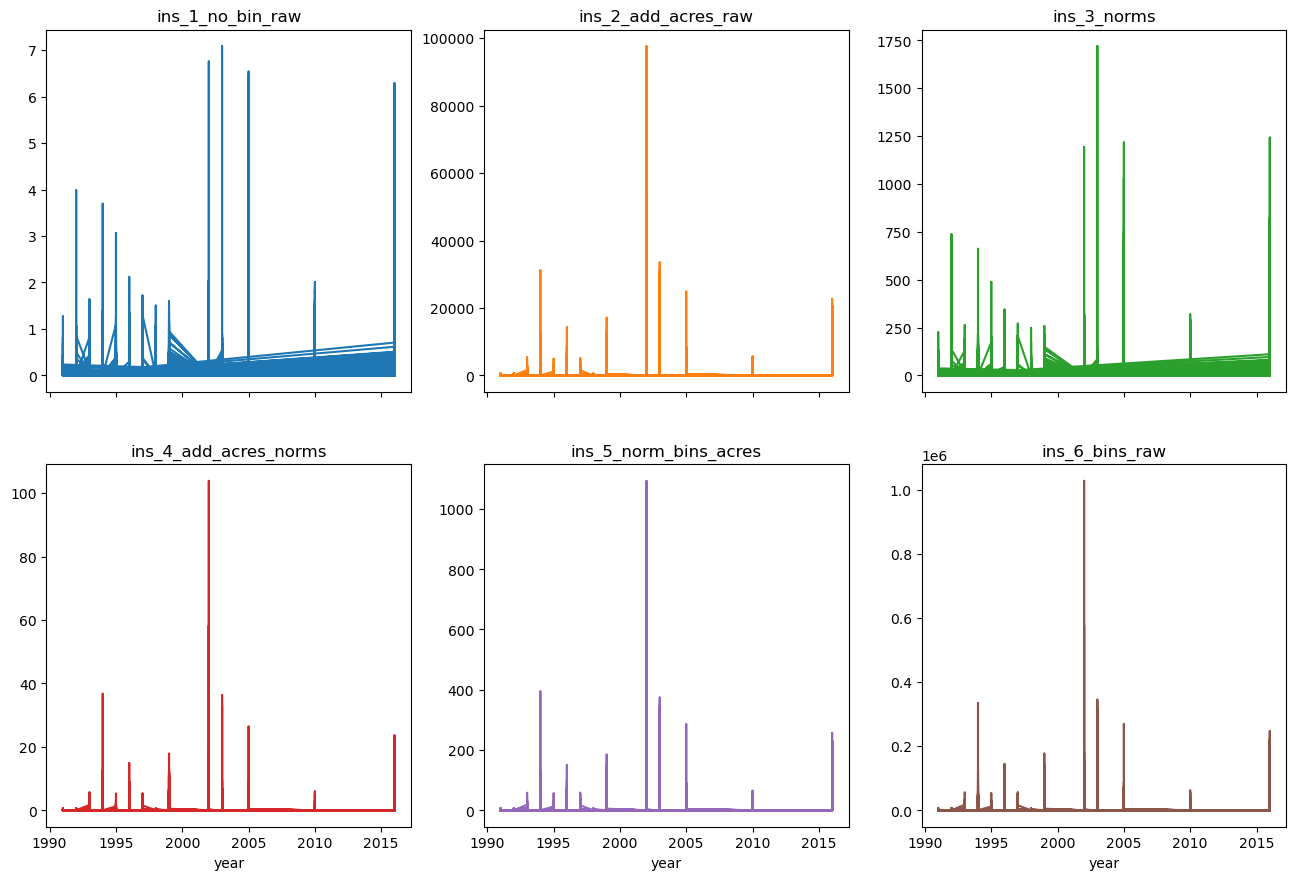

In [50]:
df1a.set_index("year").plot(
    figsize=(16,16),
    subplots=True,
    layout=(3,3),
    sharey=False,
    legend=False,
    title=['ins_1_no_bin_raw','ins_2_add_acres_raw', 'ins_3_norms', 'ins_4_add_acres_norms','ins_5_norm_bins_acres','ins_6_bins_raw'],
);

In [43]:
#corr_df=df1.corr().drop('ZCTA',axis=1).drop('ZCTA',axis=0)
corr_df=df1.corr()
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/vf/w64rxqfx43gd7d3v_lpq13680000gn/T/ipykernel_6797/4148240826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df1.corr()
/var/folders/vf/w64rxqfx43gd7d3v_lpq13680000gn/T/ipykernel_6797/4148240826.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)


,ins_1_no_bin_raw,ins_2_add_acres_raw,ins_3_norms,ins_4_add_acres_norms,ins_5_norm_bins_acres,ins_6_bins_raw,zip_pm25,zip_elevation,elevation_difference,zip_wspd,year,households_count,mean_income_per_household,median_income_per_household,percent_pop_age_10to14,percent_pop_age_5to9,percent_pop_age_under_5,percent_pop_female_age_10to14,percent_pop_female_age_5to9,percent_pop_female_age_under_5,percent_pop_male_age_5to9,percent_pop_male_age_under_5,total_population,percent_bach_deg_grad_new,percent_high_school_grad_new,percent_pop_age_15to19_new,percent_pop_female_age_15to19_new,percent_pop_male_age_10to14_new,percent_pop_male_age_15to19_new
ins_1_no_bin_raw,1.00,0.32,1.00,0.32,0.32,0.32,-0.03,-0.00,-0.05,0.21,0.27,0.06,0.11,0.11,0.01,-0.01,-0.01,0.00,-0.02,-0.02,-0.01,-0.01,0.07,0.02,-0.03,-0.04,-0.03,0.01,-0.04
ins_2_add_acres_raw,0.32,1.00,0.31,1.00,1.00,1.00,0.00,0.00,-0.02,0.09,0.14,0.03,0.06,0.06,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.03,0.01,-0.01,-0.03,-0.02,-0.00,-0.03
ins_3_norms,1.00,0.31,1.00,0.31,0.32,0.32,-0.03,-0.00,-0.05,0.21,0.27,0.06,0.11,0.11,0.01,-0.01,-0.01,0.00,-0.02,-0.02,-0.01,-0.01,0.07,0.02,-0.03,-0.04,-0.03,0.01,-0.04
ins_4_add_acres_norms,0.32,1.00,0.31,1.00,1.00,1.00,0.00,0.00,-0.02,0.09,0.14,0.03,0.06,0.06,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.03,0.01,-0.01,-0.03,-0.02,-0.00,-0.02
ins_5_norm_bins_acres,0.32,1.00,0.32,1.00,1.00,1.00,0.00,0.00,-0.02,0.09,0.15,0.03,0.06,0.06,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.03,0.01,-0.01,-0.03,-0.02,-0.00,-0.03
ins_6_bins_raw,0.32,1.00,0.32,1.00,1.00,1.00,0.00,0.00,-0.02,0.09,0.15,0.03,0.06,0.06,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.03,0.02,-0.01,-0.03,-0.02,-0.00,-0.03
zip_pm25,-0.03,0.00,-0.03,0.00,0.00,0.00,1.00,-0.43,0.46,0.00,-0.33,0.44,-0.05,-0.04,0.03,0.03,0.10,-0.01,-0.04,-0.00,-0.01,0.06,0.44,0.02,-0.18,0.09,0.02,-0.03,0.04
zip_elevation,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.43,1.00,-0.97,-0.29,-0.00,-0.40,-0.17,-0.15,0.00,-0.00,-0.07,0.07,0.08,0.03,0.03,-0.01,-0.38,-0.10,0.18,0.00,0.08,0.07,0.02
elevation_difference,-0.05,-0.02,-0.05,-0.02,-0.02,-0.02,0.46,-0.97,1.00,0.24,-0.09,0.38,0.13,0.11,0.00,0.01,0.08,-0.06,-0.07,-0.02,-0.02,0.02,0.36,0.08,-0.18,0.02,-0.06,-0.07,-0.00
zip_wspd,0.21,0.09,0.21,0.09,0.09,0.09,0.00,-0.29,0.24,1.00,-0.01,0.15,0.16,0.17,-0.02,0.00,0.06,-0.03,-0.03,0.01,0.02,0.03,0.13,0.16,-0.02,-0.02,-0.03,-0.04,-0.03


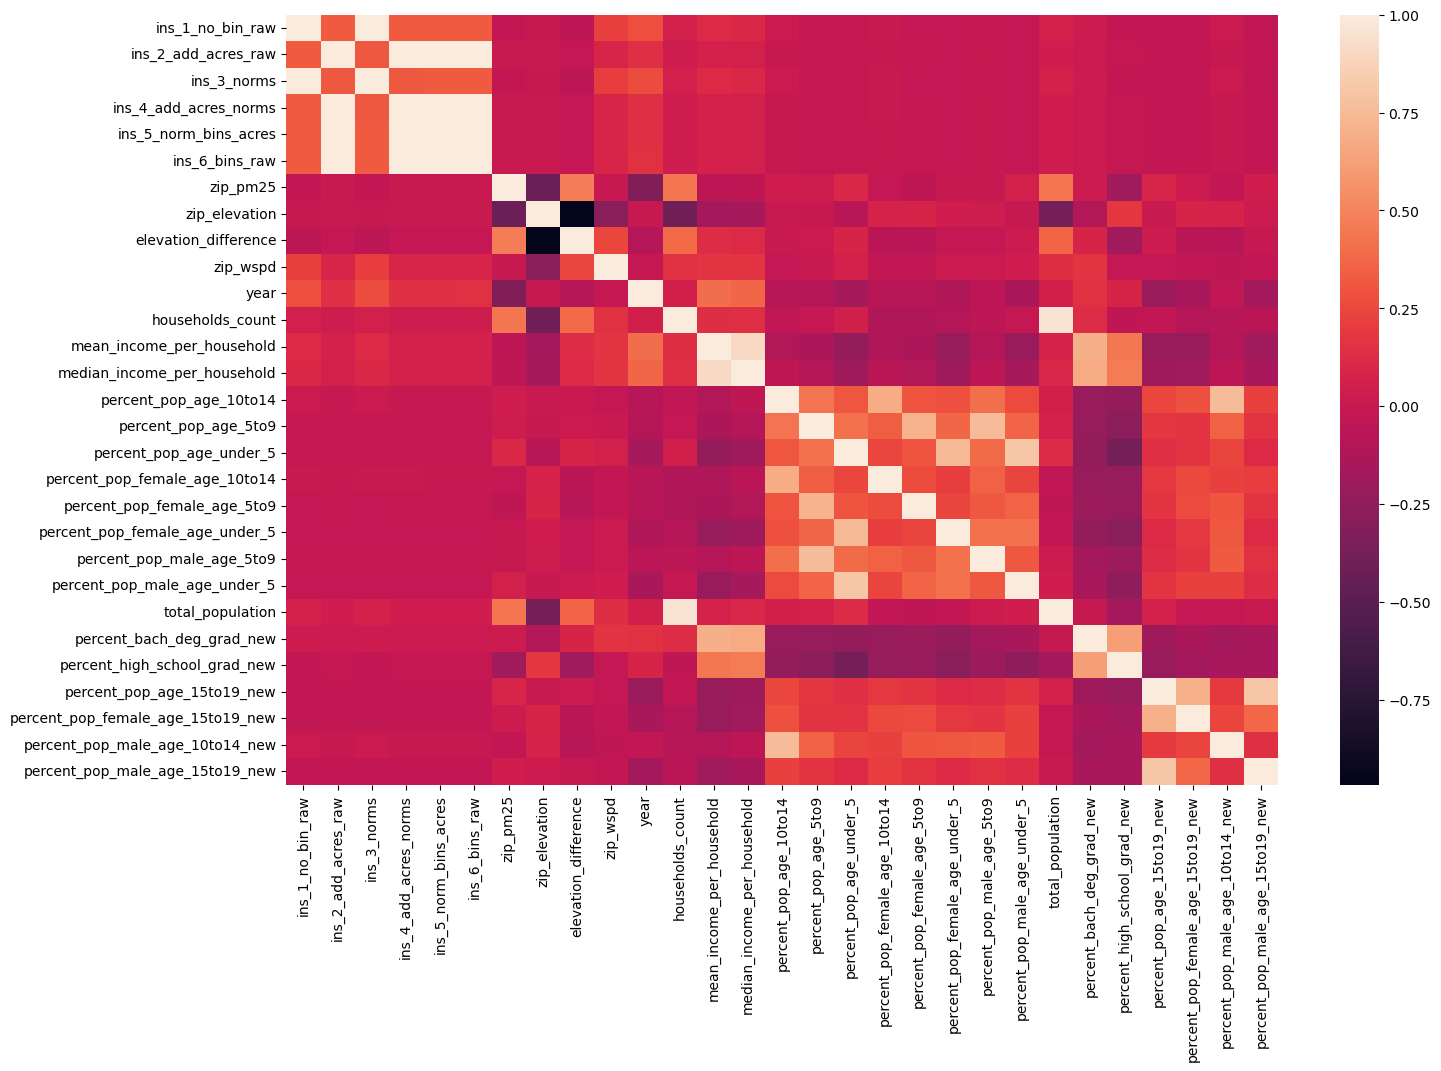

In [44]:
fig, ax = plt.subplots(figsize=(16, 10))
hmap=sns.heatmap(corr_df)

In [49]:
np.tril(np.ones(corr_df.shape)).astype(np.bool)[0:5,0:5]
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

fig, ax = plt.subplots(figsize=(16, 10))
hmap=sns.heatmap(df_lt,cmap="Spectral")

/var/folders/vf/w64rxqfx43gd7d3v_lpq13680000gn/T/ipykernel_6797/3172025710.py:1: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  np.tril(np.ones(corr_df.shape)).astype(np.bool)[0:5,0:5]


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Axes: ylabel='Frequency'>

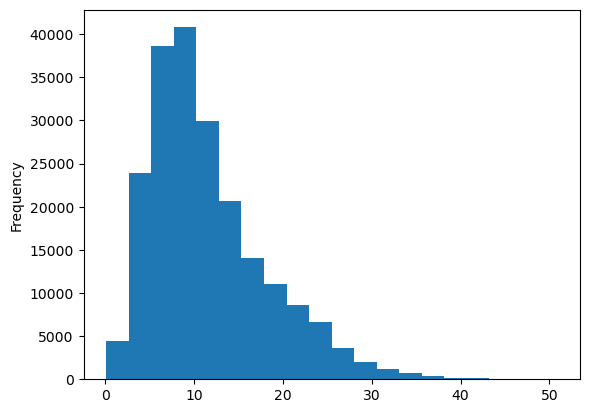

In [46]:
df1.loc[:,"zip_pm25"].plot.hist(bins=20)

In [47]:
#select columns for pairplots
#sns.pairplot(df1)

## Notes
### Preferred instrument: instrument 1 or instrument 6
### Preferred features: see blow xvar1 list contains the preferred features 
### Other features dropped based on correlation matrix and Lasso regression
### R-squared=69%: based on the model with instrument1 and the preferred features (xvar)
### Feature importance is show in the charts below: Seasonality(month) seems to be a major contributor in addition to zipcode specific factors and elevation


## Baseline Linear Regression

In [53]:

#identify the x and y variables/columns
#instruments=['ins_1_no_bin_raw', 'ins_2_add_acres_raw', 'ins_3_norms','ins_4_add_acres_norms', 'ins_5_norm_dist_numerator','ins_6_sub_bins_raw']
#replace any of the instruments in the xvar below to create a new xvar and run the function

xvar=['ins_6_bins_raw', 'zip_elevation',
       'elevation_difference', 'zip_wspd', 'year', 'households_count',
       'mean_income_per_household', 'median_income_per_household',
       'percent_pop_age_10to14', 'percent_pop_age_5to9',
       'percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5',
       'percent_pop_male_age_5to9', 'percent_pop_male_age_under_5',
       'total_population', 'percent_bach_deg_grad_new',
       'percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new', 'percent_pop_male_age_10to14_new',
       'percent_pop_male_age_15to19_new', 'ZCTA','month']


xvar4=['ins_4_add_acres_norms','zip_elevation','zip_wspd', 'year','median_income_per_household','percent_pop_age_10to14', 'percent_pop_age_5to9','percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5','total_population', 'percent_bach_deg_grad_new','percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new','month','ZCTA']

xvar5=['ins_5_norm_bins_acres','zip_elevation','zip_wspd', 'year','median_income_per_household','percent_pop_age_10to14', 'percent_pop_age_5to9','percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5','total_population', 'percent_bach_deg_grad_new','percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new','month','ZCTA']

xvar1=['ins_1_no_bin_raw','zip_elevation','zip_wspd', 'year','median_income_per_household','percent_pop_age_10to14', 'percent_pop_age_5to9','percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5','total_population', 'percent_bach_deg_grad_new','percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new','month','ZCTA']

#removed variables:['elevation_difference','mean_income_per_household','households_count','percent_pop_male_age_10to14_new','percent_pop_male_age_15to19_new','percent_pop_male_age_5to9','percent_pop_male_age_under_5']
yvar=['zip_pm25']


X=(df1.loc[:,xvar])
y=(df1.loc[:,yvar])

In [54]:
#Preprocess numeric columns
numeric_features=X.select_dtypes(exclude="string").columns
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])

In [55]:
#Preprocess categorical columns
categorical_features=X.select_dtypes(include="string").columns
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [56]:
#define the estimator
estimator = TransformedTargetRegressor(regressor=LinearRegression(),func=np.log1p,inverse_func=np.expm1)
#estimator = TransformedTargetRegressor(regressor=LinearRegression(),transformer=MinMaxScaler())

In [58]:
#split the data into test and train
#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)
for train_idx, test_idx in gtss.split(groups, groups=groups):
    cv = GroupTimeSeriesSplit(**cv_args)
    for train_index, test_index in cv.split(groups,groups=groups):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

NameError: name 'gtss' is not defined

In [38]:
#specify gridsearch
gridsearchcv = GridSearchCV(
    estimator,
    param_grid={'regressor__fit_intercept': [True, False]},
    cv=5,
    scoring=('r2'),
    return_train_score=True,
    refit='r2',
    n_jobs=-1
)
#scoring=('r2', 'neg_mean_absolute_error'),

In [39]:
#combine two preprocess steps with column transformer
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),('cat',categorical_transformer,categorical_features)])

In [40]:
#Train the model
lr=Pipeline(steps=[('preprocessor',preprocessor),('gridsearchcv',gridsearchcv)])
#lr.fit(X_train, y_train)
#gridsearchcv.fit(X,y,groups=groups)
#scores = cross_val_score(estimator, X, y, groups=groups, scoring="r2", cv=cv)

In [89]:
lr.score(X_train, y_train)

0.8099736361791281

In [102]:
#specify gridsearch
tscv = TimeSeriesSplit(n_splits = 5)
gridsearchcv = GridSearchCV(
    estimator,
    param_grid={'regressor__fit_intercept': [True, False]},
    cv=tscv,
    scoring=('r2'),
    return_train_score=True,
    refit='r2',
    n_jobs=-1
)

In [106]:
#specify gridsearch and change cv to tscv
tscv = TimeSeriesSplit(n_splits = 5)
gridsearchcv = GridSearchCV(
    estimator,
    param_grid={'regressor__fit_intercept': [True, False]},
    cv=tscv,
    scoring=('r2'),
    return_train_score=True,
    refit='r2',
    n_jobs=-1
)

#cross validation
tscv = TimeSeriesSplit(n_splits = 5)

rscore=[]
mse_tss=[]
mae_tss=[]
rmse_tss=[]

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_true=y_test
    mae_tss.append(mean_absolute_error(y_true, y_pred))
    mse_tss.append(mean_squared_error(y_true, y_pred,squared=True))
    rmse_tss.append(mean_squared_error(y_true, y_pred,squared=False))
    rscore.append(r2_score(y_true,y_pred))

In [ ]:
cv_args = {"test_size": 2, "n_splits": 3}
cv = GroupTimeSeriesSplit(**cv_args)
for train_index, test_index in cv.split(groups,groups=groups):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [54]:
from sklearn.model_selection import cross_val_score

from mlxtend.evaluate.time_series import (
    GroupTimeSeriesSplit,
    plot_splits,
    print_cv_info,
    print_split_info,
)
groups=np.array((X.index))
cv_args = {"test_size": 1, "train_size": 3}
cv = GroupTimeSeriesSplit(**cv_args)
scores = cross_val_score(lr, X, y, groups=groups, scoring='r2', cv=cv)
#print_cv_info(cv, X, y, groups, lr, scores)

In [51]:
groups=np.array((X.index))
cv_args = {"test_size": 1, "train_size": 3}
cv = GroupTimeSeriesSplit(**cv_args)

gridsearchcv = GridSearchCV(
    estimator,
    param_grid={'regressor__fit_intercept': [True, False]},
    cv=cv,
    scoring=('r2'),
    return_train_score=True,
    refit='r2',
    n_jobs=-1
)

#cross validation



rscore=[]
mse_tss=[]
mae_tss=[]
rmse_tss=[]

for train_index, test_index in cv.split(groups,groups=groups):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_true=y_test
#    mae_tss.append(mean_absolute_error(y_true, y_pred))
    mse_tss.append(mean_squared_error(y_true, y_pred,squared=True))
    rmse_tss.append(mean_squared_error(y_true, y_pred,squared=False))
    rscore.append(r2_score(y_true,y_pred))

In [108]:
#specify gridsearch and change cv to tscv
tscv = TimeSeriesSplit(n_splits = 5)
gridsearchcv = GridSearchCV(
    estimator,
    param_grid={'regressor__fit_intercept': [True, False]},
    cv=tscv,
    scoring=('r2'),
    return_train_score=True,
    refit='r2',
    n_jobs=-1
)

#cross validation
tscv = TimeSeriesSplit(n_splits = 5)

rscore=[]
mse_tss=[]
mae_tss=[]
rmse_tss=[]

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_true=y_test
    mae_tss.append(mean_absolute_error(y_true, y_pred))
    mse_tss.append(mean_squared_error(y_true, y_pred,squared=True))
    rmse_tss.append(mean_squared_error(y_true, y_pred,squared=False))
    rscore.append(r2_score(y_true,y_pred))

[28.603299924067358,
 6.693907844970175,
 14.74006687186177,
 9.438145381454712,
 5.9781682901571696]

In [285]:
#extract features
features=lr[:-1].get_feature_names_out()
pd.DataFrame(features)

,0
0,num__ins_5_norm_dist_numerator
1,num__zip_elevation
2,num__elevation_difference
3,num__zip_wspd
4,num__year
...,...
1628,cat__month_08
1629,cat__month_09
1630,cat__month_10
1631,cat__month_11


<AxesSubplot:>

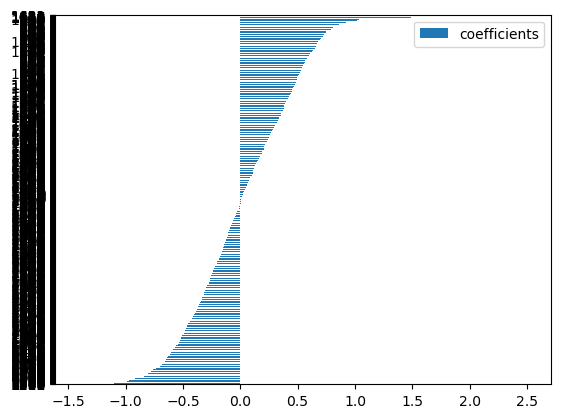

In [298]:
#lr[-1].coef_
#extract features
features=lr[:-1].get_feature_names_out()

#extract coefficients
coefficients=(results['gridsearchcv'].best_estimator_.regressor_.coef_)

#combine coefficients and features
cf=list(zip(coefficients, features))
cf1=pd.DataFrame(cf).rename(columns={0:"coefficients",1:"Features"}).sort_values(by="coefficients", ascending=True)

#show table of values and also plot
cf1
cf1.query("coefficients<0.01 and coefficients >-0.01").set_index("Features").plot.barh(figsize=(10,12),title='Features with Relatively Low Coefficient Values')

<AxesSubplot:title={'center':'Features with Relatively Low Coefficient Values'}, ylabel='Features'>

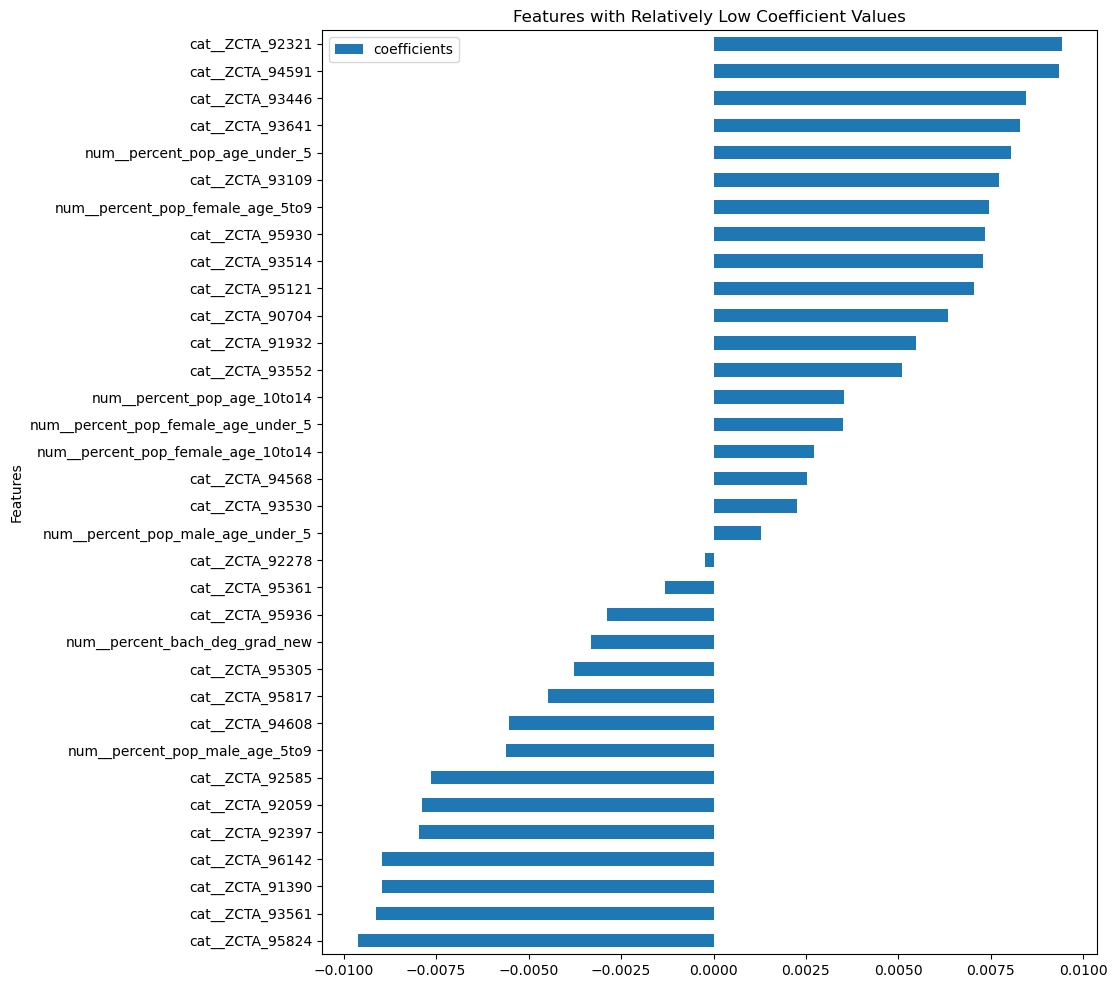

In [323]:
cf1.query("coefficients<0.01 and coefficients >-0.01").set_index("Features").plot.barh(figsize=(10,12),title='Features with Relatively Low Coefficient Values')

In [113]:
#extact coefficients of best model
results=lr.fit(X_train, y_train)
results['gridsearchcv'].best_estimator_.regressor_.coef_

array([ 0.02518387, -0.11842928,  0.09341628, ...,  2.47611349,
        2.61395485,  2.50805091])

In [381]:
#Evaluate the model
R_squared_train=lr.score(X_train, y_train)
R_squared_test=lr.score(X_test,y_test)
print("R-squared from Training:", R_squared_train)
print("R-squared from Test:", R_squared_test)

R-squared from Training: 0.21723403469743285
R-squared from Test: 0.20736927624127655


In [176]:
#predicted vs actual values
y_pred=lr.predict(X_test)
y_true=y_test

In [177]:
#Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse=mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE", rmse)

MAE: 2.0202797350597663
MSE: 8.35988933591639
RMSE 2.8913473219100454


<AxesSubplot:ylabel='Frequency'>

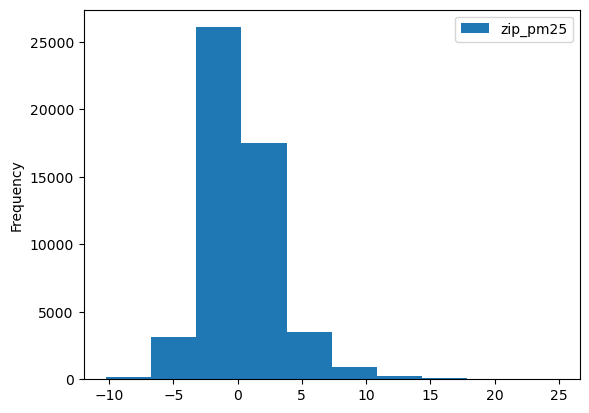

In [178]:
(y_true-y_pred).plot.hist()

<AxesSubplot:title={'center':'Features with Relatively Low Coefficient Values'}, ylabel='Features'>

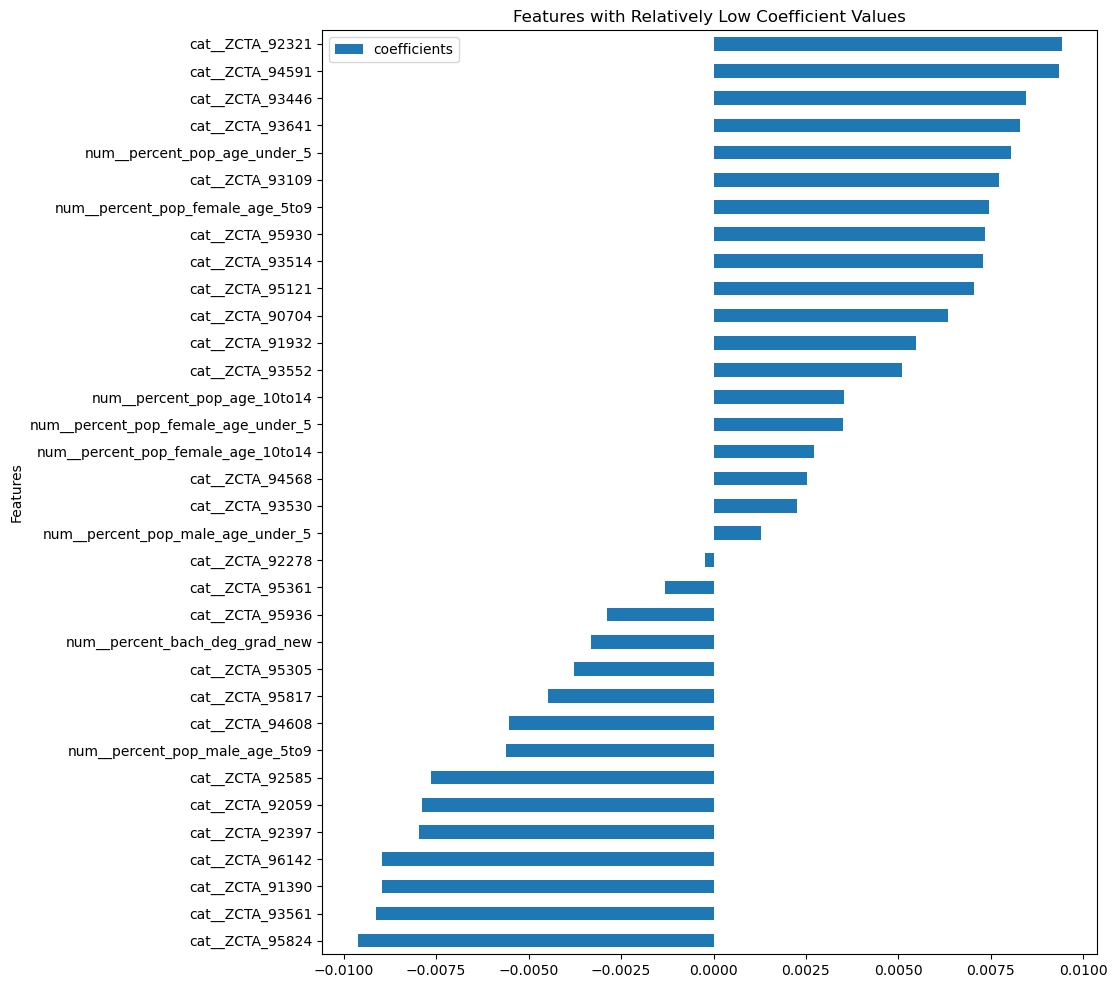

In [332]:
#extract features
#lr[-1].coef_
features=lr[:-1].get_feature_names_out()

#extract coefficients
coefficients=(results['gridsearchcv'].best_estimator_.regressor_.coef_)

#combine coefficients and features
cf=list(zip(coefficients, features))
cf1=pd.DataFrame(cf).rename(columns={0:"coefficients",1:"Features"}).sort_values(by="coefficients", ascending=True)

#show table of values and also plot
cf1.query("coefficients<0.01 and coefficients >-0.01").set_index("Features").plot.barh(figsize=(10,12),title='Features with Relatively Low Coefficient Values')

In [338]:
#print(cf1.to_markdown())

<AxesSubplot:title={'center':'Features with Largest Negative Values'}, ylabel='Features'>

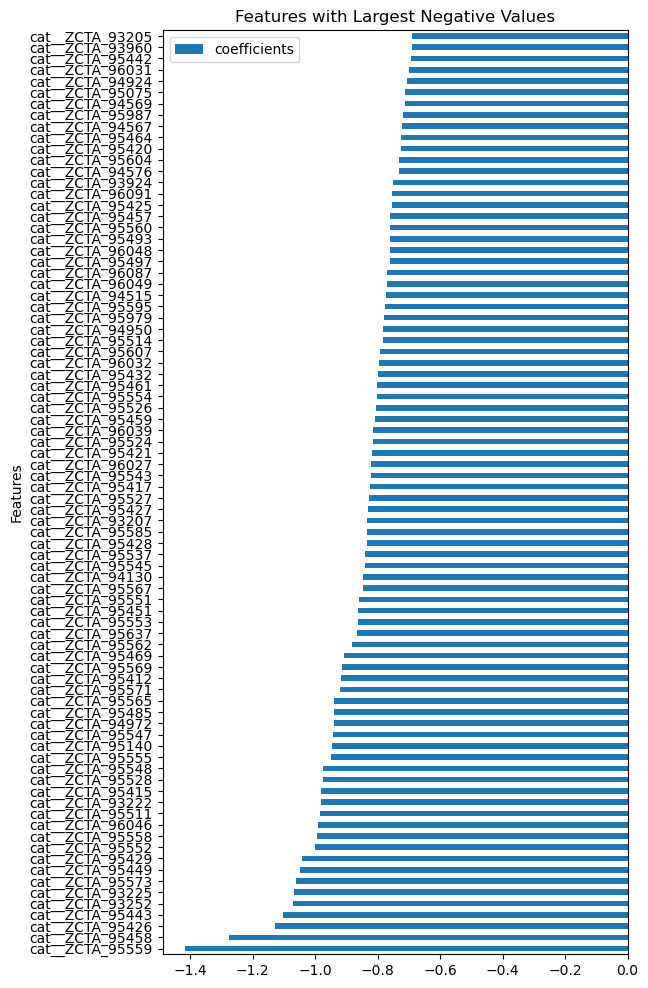

In [359]:
#Features with largest Negative Values
lb=cf1.loc[:,"coefficients"]<(cf1.loc[:,"coefficients"].quantile(0.05))
cf1[lb].set_index("Features").plot.barh(figsize=(6,12),title='Features with Largest Negative Values')

<AxesSubplot:title={'center':'Features with Largest Positive Values'}, ylabel='Features'>

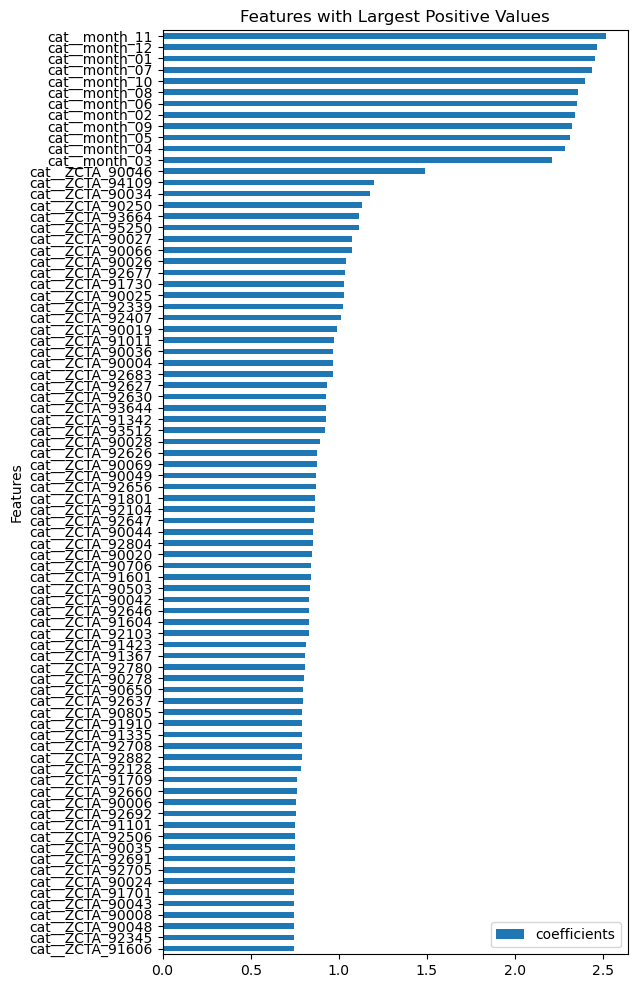

In [362]:
#Largest Positive Coefficients
ub=cf1.loc[:,"coefficients"]>(cf1.loc[:,"coefficients"].quantile(0.95))
cf1[ub].set_index("Features").plot.barh(figsize=(6,12),title='Features with Largest Positive Values')

## Baseline Regression Model Function

In [25]:
#identify the x and y variables/columns
#instruments=['ins_1_no_bin_raw', 'ins_2_add_acres_raw', 'ins_3_norms','ins_4_add_acres_norms', 'ins_5_norm_dist_numerator','ins_6_sub_bins_raw']
#replace any of the instruments in the xvar below to create a new xvar and run the function

xvar=['ins_1_no_bin_raw', 'zip_elevation',
       'elevation_difference', 'zip_wspd', 'year', 'households_count',
       'mean_income_per_household', 'median_income_per_household',
       'percent_pop_age_10to14', 'percent_pop_age_5to9',
       'percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5',
       'percent_pop_male_age_5to9', 'percent_pop_male_age_under_5',
       'total_population', 'percent_bach_deg_grad_new',
       'percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new', 'percent_pop_male_age_10to14_new',
       'percent_pop_male_age_15to19_new', 'ZCTA','month']


xvar6=['ins_6_sub_bins_raw','zip_elevation','zip_wspd', 'year','median_income_per_household','percent_pop_age_10to14', 'percent_pop_age_5to9','percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5','total_population', 'percent_bach_deg_grad_new','percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new','month','ZCTA']

xvar1=['ins_1_no_bin_raw','zip_elevation','zip_wspd', 'year','median_income_per_household','percent_pop_age_10to14', 'percent_pop_age_5to9','percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5','total_population', 'percent_bach_deg_grad_new','percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new','month','ZCTA']


#removed variables - these variables are highly correlated with others and have been dropped from the list of features(see correlation matrix for details)
#['elevation_difference','mean_income_per_household','households_count','percent_pop_male_age_10to14_new','percent_pop_male_age_15to19_new','percent_pop_male_age_5to9','percent_pop_male_age_under_5']

yvar=['zip_pm25']

In [26]:
def lrmodels(a,b):
    """Provide different feature sets (xvar or xvar1 or any xvar consisting of different selected features) to run linear regression model
    The function arguments(inputs) are a:xvar and b:yvar  
    There are 6 different instruments and each one can be replaced in xvar to run the model and assess impact"""

    X=(df1.loc[:,a])
    y=(df1.loc[:,b])
 
#Preprocess numeric columns
    numeric_features=X.select_dtypes(exclude="string").columns
    numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])

#Preprocess categorical columns
    categorical_features=X.select_dtypes(include="string").columns
    categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])
   
#define the estimator
    estimator = TransformedTargetRegressor(regressor=LinearRegression(),func=np.log1p,inverse_func=np.expm1)
#estimator = TransformedTargetRegressor(regressor=LinearRegression(),transformer=MinMaxScaler())

#specify gridsearch
    gridsearchcv = GridSearchCV(
        estimator,
        param_grid={'regressor__fit_intercept': [True, False]},
        cv=5,
        scoring=('r2'),
        return_train_score=True,
        refit='r2',
        n_jobs=-1
    )

#combine two preprocess steps with column transformer
    preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),('cat',categorical_transformer,categorical_features)])

#splitting the data into test and train
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

#Train the model
    lr=Pipeline(steps=[('preprocessor',preprocessor),('gridsearchcv',gridsearchcv)])
    lr.fit(X_train, y_train)
    
#Evaluate the model
    R_squared_train=lr.score(X_train, y_train)
    R_squared_test=lr.score(X_test,y_test)
    print("R-squared from Training:", R_squared_train)
    print("R-squared from Test:", R_squared_test)
    
#predicted vs actual values
    y_pred=lr.predict(X_test)
    y_true=y_test
    
#Evaluation Metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
    mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
    rmse=mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE", rmse)
    
    (y_true-y_pred).plot.hist()
    
#extract coefficients
#    lrcoeffs=list(zip(results['gridsearchcv'].best_estimator_.regressor_.coef_,X.columns))
#    lrcoeffs1=pd.DataFrame(lrcoeffs).rename(columns={0:"coefficients", 1:"Feature"}).sort_values('coefficients',ascending=False).set_index("Feature")
#    lrcoeffs1.plot.barh()
    
    
#extract features
    features=lr[:-1].get_feature_names_out()

#extract coefficients
    results=lr.fit(X_train, y_train)
    coefficients=(results['gridsearchcv'].best_estimator_.regressor_.coef_)

#combine coefficients and features
    cf=list(zip(coefficients, features))
    cf1=pd.DataFrame(cf).rename(columns={0:"coefficients",1:"Features"}).sort_values(by="coefficients", ascending=True)

#show table of values and also plot
    cf1.query("coefficients<0.01 and coefficients >-0.01").set_index("Features").plot.barh(figsize=(10,12),title='Features with Relatively Low Coefficient Values')
    
#Features with largest Negative Values
    lb=cf1.loc[:,"coefficients"]<(cf1.loc[:,"coefficients"].quantile(0.05))
    cf1[lb].set_index("Features").plot.barh(figsize=(6,12),title='Features with Largest Negative Values')
    
#Largest Positive Coefficients
    ub=cf1.loc[:,"coefficients"]>(cf1.loc[:,"coefficients"].quantile(0.95))
    cf1[ub].set_index("Features").plot.barh(figsize=(6,12),title='Features with Largest Positive Values')
    
#Cross Validation    
#specify gridsearch and change cv to tscv
    tscv = TimeSeriesSplit(n_splits = 5)
    gridsearchcv = GridSearchCV(
    estimator,
    param_grid={'regressor__fit_intercept': [True, False]},
    cv=tscv,
    scoring=('r2'),
    return_train_score=True,
    refit='r2',
    n_jobs=-1
)

#cross validation
    tscv = TimeSeriesSplit(n_splits = 5)

    rscore=[]
    mse_tss=[]
    mae_tss=[]
    rmse_tss=[]

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        y_true=y_test
        mae_tss.append(mean_absolute_error(y_true, y_pred))
        mse_tss.append(mean_squared_error(y_true, y_pred,squared=True))
        rmse_tss.append(mean_squared_error(y_true, y_pred,squared=False))
        rscore.append(r2_score(y_true,y_pred))
    
    return rscore, mse_tss

In [62]:

#for train_idx, test_idx in gtss.split(groups, groups=groups):
#cv = GroupTimeSeriesSplit(**cv_args)
#for train_index, test_index in cv.split(groups,groups=groups):
#    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

R-squared from Training: 0.8071700355135648
R-squared from Test: 0.8026675962539932
MAE: 2.0233242003863725
MSE: 8.556673024166404
RMSE 2.925179143944248


([0.6672273922046872,
  0.7667373043087604,
  0.6326782231718873,
  0.7608931241299298,
  0.6225417498335406],
 [16.90885752824964,
  6.6753528642285,
  15.37289378015573,
  9.37663940046612,
  5.709558832566002])

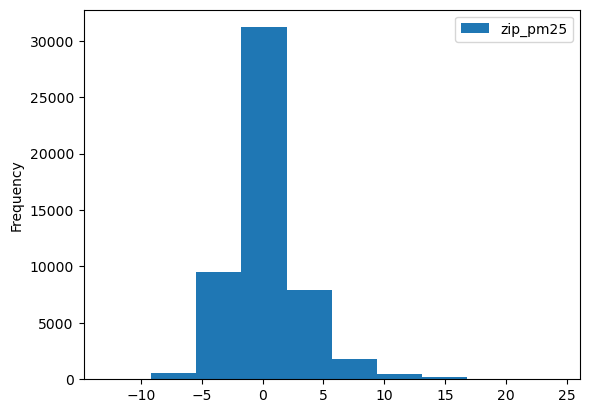

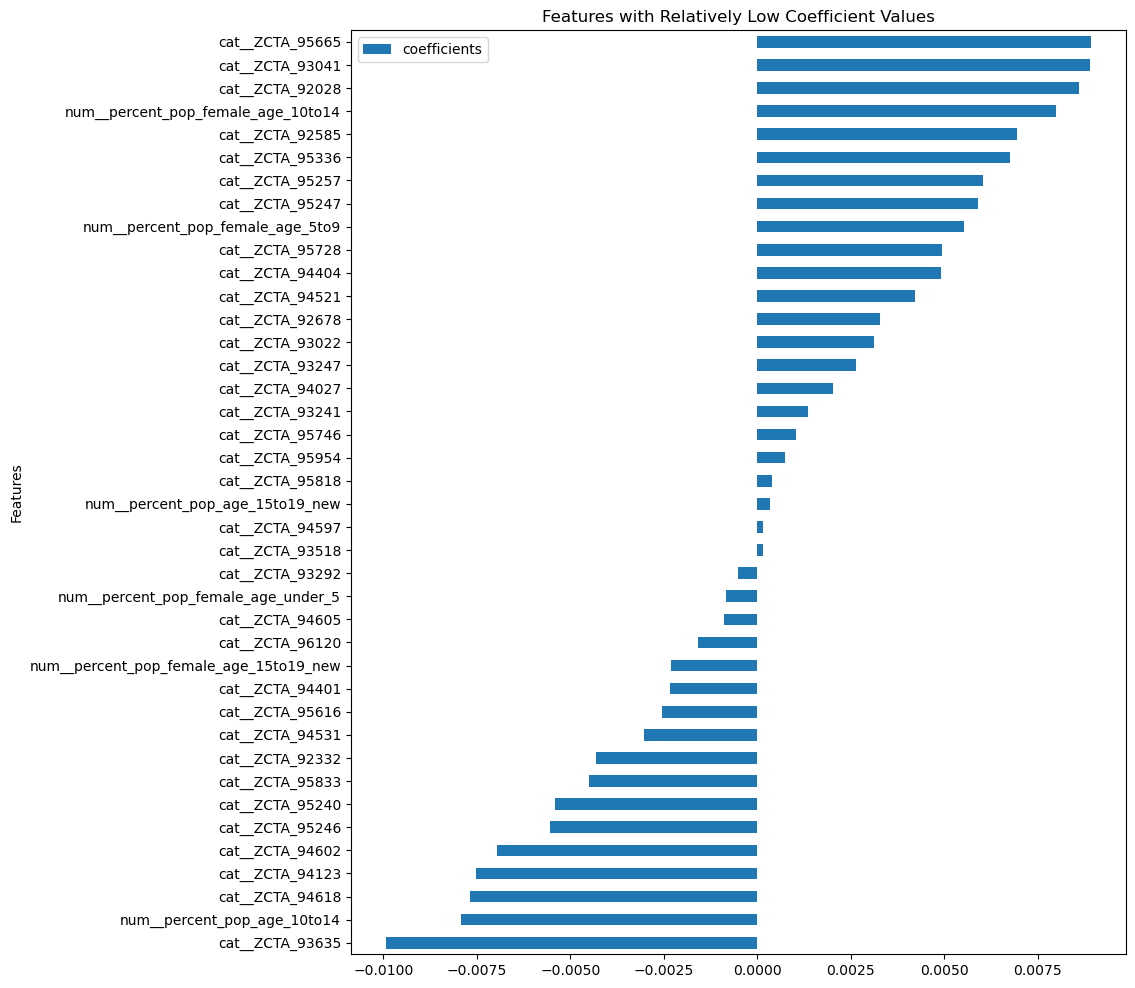

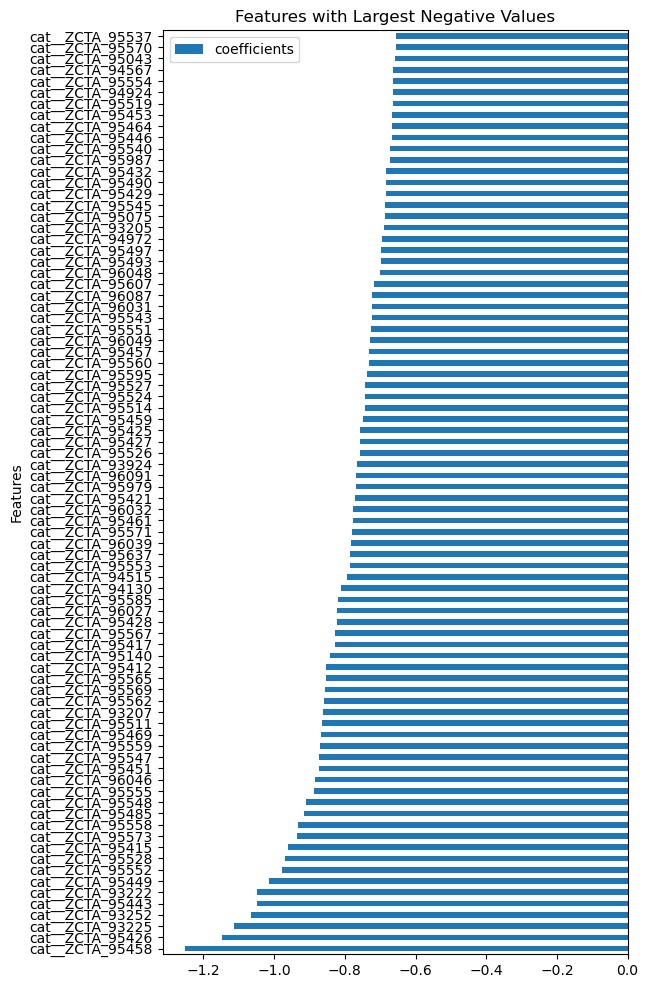

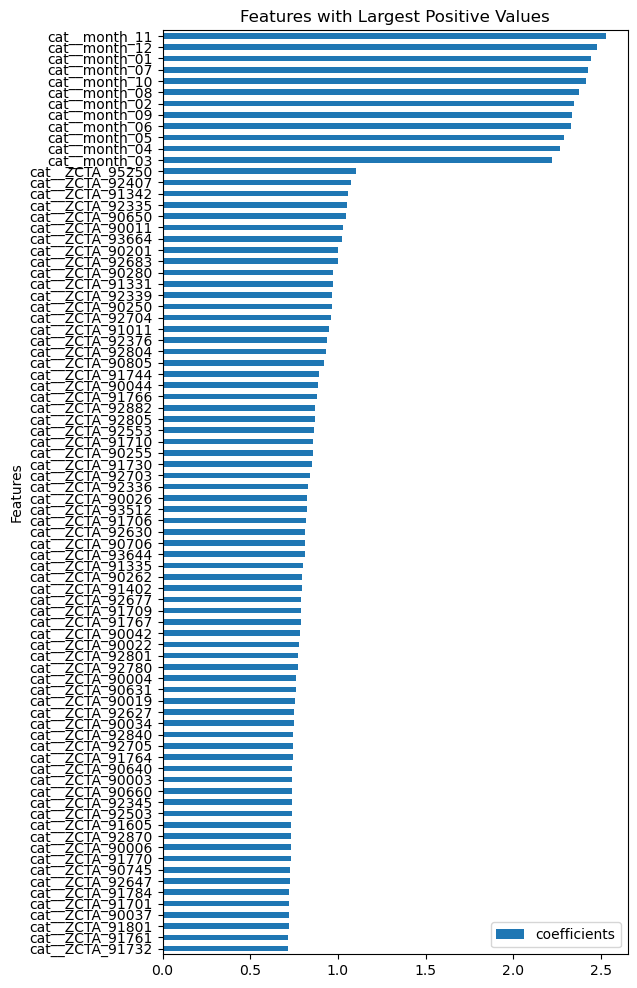

In [27]:
lrmodels(xvar1,yvar)

## Lasso Regression

In [29]:
#identify the x and y variables/columns
#instruments=['ins_1_no_bin_raw', 'ins_2_add_acres_raw', 'ins_3_norms','ins_4_add_acres_norms', 'ins_5_norm_dist_numerator','ins_6_sub_bins_raw']
#replace any of the instruments in the xvar below to create a new xvar and run the function

xvar=['ins_6_sub_bins_raw', 'zip_elevation',
       'elevation_difference', 'zip_wspd', 'year', 'households_count',
       'mean_income_per_household', 'median_income_per_household',
       'percent_pop_age_10to14', 'percent_pop_age_5to9',
       'percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5',
       'percent_pop_male_age_5to9', 'percent_pop_male_age_under_5',
       'total_population', 'percent_bach_deg_grad_new',
       'percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new', 'percent_pop_male_age_10to14_new',
       'percent_pop_male_age_15to19_new', 'ZCTA','month']


xvar5=['ins_5_norm_dist_numerator','zip_elevation','zip_wspd', 'year','median_income_per_household','percent_pop_age_10to14', 'percent_pop_age_5to9','percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5','total_population', 'percent_bach_deg_grad_new','percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new','month','ZCTA']

xvar1=['ins_1_no_bin_raw','zip_elevation','zip_wspd', 'year','median_income_per_household','percent_pop_age_10to14', 'percent_pop_age_5to9','percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5','total_population', 'percent_bach_deg_grad_new','percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new','month','ZCTA']

#removed variables:['elevation_difference','mean_income_per_household','households_count','percent_pop_male_age_10to14_new','percent_pop_male_age_15to19_new','percent_pop_male_age_5to9','percent_pop_male_age_under_5']
yvar=['zip_pm25']


X=(df1.loc[:,xvar])
y=(df1.loc[:,yvar])

In [30]:
#Preprocess numeric columns
numeric_features1=X.select_dtypes(exclude="string").columns
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])

In [31]:
#Preprocess categorical columns
categorical_features1=X.select_dtypes(include="string").columns
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [32]:
#define the estimator
lasso = Lasso()

In [33]:
#specify gridsearch
param={'alpha':(np.arange(0.05,1,0.1))}
#gridsearchcv = GridSearchCV(lasso,param,cv=10,scoring=('r2', 'neg_mean_absolute_error'),return_train_score=True, refit='neg_mean_absolute_error',n_jobs=-1)
gridsearchcv = GridSearchCV(lasso,param,cv=10,scoring='neg_mean_absolute_error')

In [34]:
#splitting the data into test and train
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

#combine two preprocess steps with column transformer
preprocessor1=ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features1),('cat',categorical_transformer,categorical_features1)])

In [ ]:
#Train the model
lr_lasso=Pipeline(steps=[('preprocessor1',preprocessor1),('gridsearchcv',gridsearchcv)])
lr_lasso.fit(X_train, y_train)
results=lr_lasso.fit(X_train, y_train)

In [169]:
#extact coefficients of best model
print('Best score:', abs(gridsearchcv.best_score_))

Best score: 3.734107488732493


In [170]:
#print best alpha
print('Best alpha:',gridsearchcv.best_params_)

Best alpha: {'alpha': 0.01}


In [171]:
#bestimator=gridsearchcv.best_estimator_
#bestimator.predict(X_test)

In [172]:
y_predl=lr_lasso.predict(X_test)
y_true=y_test
y_true.reset_index(drop=True,inplace=True)
y_predl1=pd.DataFrame(y_predl)

<AxesSubplot:ylabel='Frequency'>

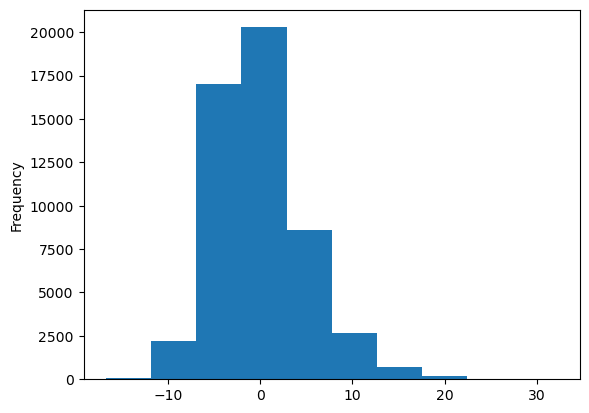

In [173]:
ldiff=y_true.join(y_predl1).rename(columns={"zip_pm25":"y_true", 0:"y_pred"})
#ldiff=ldiff.assign(diff=y_true-y_pred)
ldiff.loc[:,"diff"]=ldiff['y_true']-ldiff['y_pred']
ldiff.loc[:,"diff"].plot.hist()

In [174]:
#computer r-squared from lasso regression
r2_score(y_true, y_predl)

0.4579409385987737

In [175]:
#compute mean squared error
mean_squared_error(y_true,y_predl)

23.504614853660044

In [176]:
#Evaluate the model
train_lasso=lr_lasso.score(X_train, y_train)
test_lasso=lr_lasso.score(X_test,y_test)
print(train_lasso)
print(test_lasso)

-3.733329080430236
-3.7335540666464015


<AxesSubplot:title={'center':'Features with Relatively Low Coefficient Values'}, ylabel='Features'>

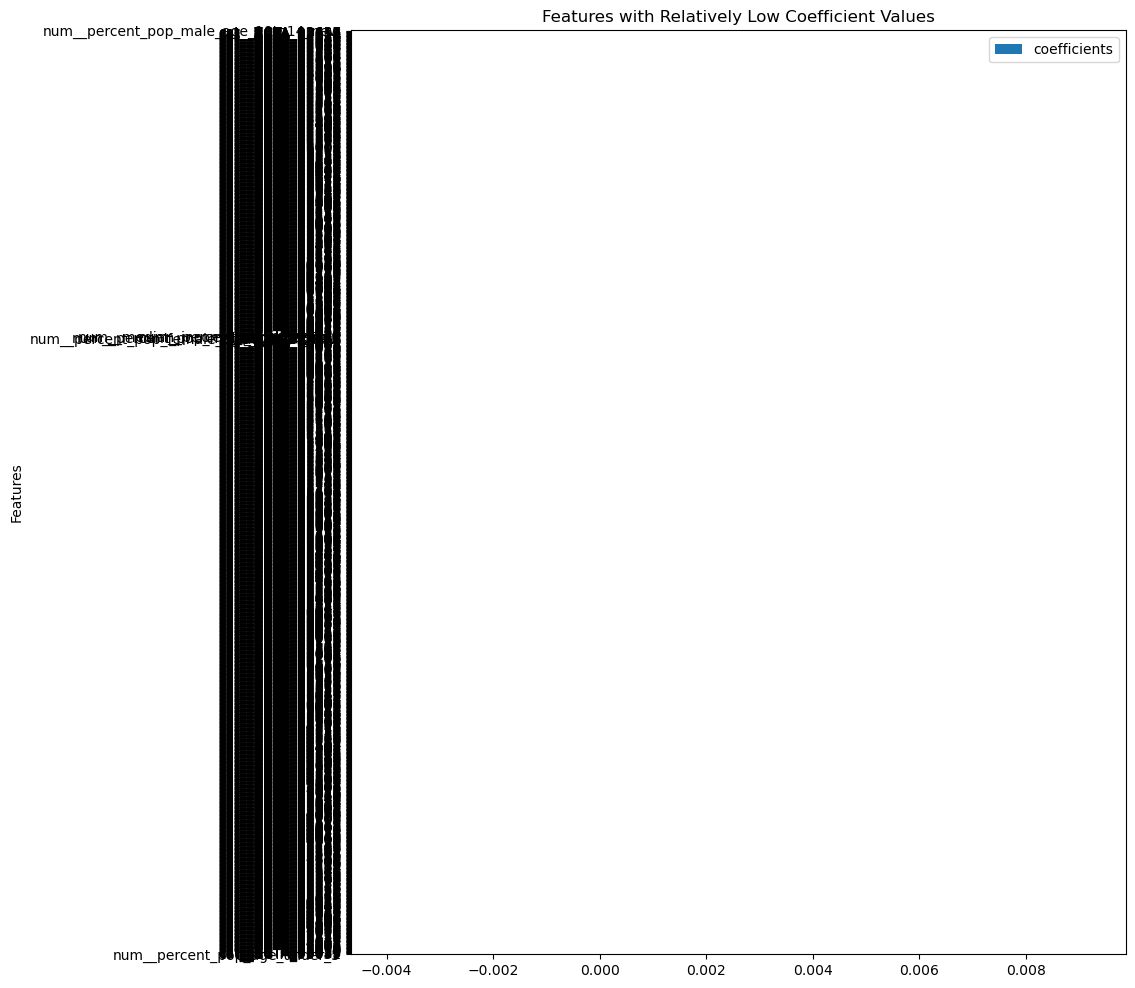

In [177]:
#extract features
features=lr_lasso[:-1].get_feature_names_out()

#extract coefficients
coefficients=(results['gridsearchcv'].best_estimator_.coef_)

#combine coefficients and features
lcf=list(zip(coefficients, features))
lcf1=pd.DataFrame(lcf).rename(columns={0:"coefficients",1:"Features"}).sort_values(by="coefficients", ascending=True)

#show table of values and also plot
lcf1
lcf1.query("coefficients<0.01 and coefficients >-0.01").set_index("Features").plot.barh(figsize=(10,12),title='Features with Relatively Low Coefficient Values')

In [178]:
#print(lcf1.to_markdown())


array([ 0.19367589, -0.53041248,  1.43917621, ...,  0.        ,
        1.99597124,  1.13044443])

<AxesSubplot:title={'center':'Features with Largest Negative Values'}, ylabel='Features'>

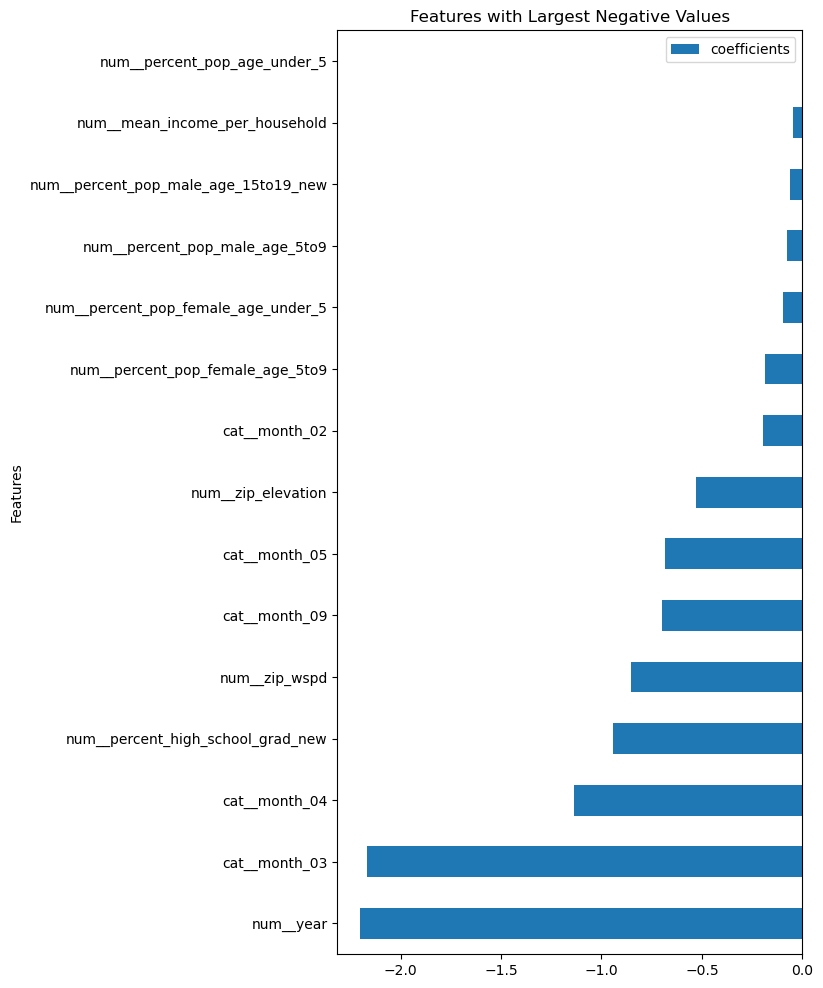

In [92]:
#Features with largest Negative Values
lb=lcf1.loc[:,"coefficients"]<(lcf1.loc[:,"coefficients"].quantile(0.05))
lcf1[lb].set_index("Features").plot.barh(figsize=(6,12),title='Features with Largest Negative Values')

<AxesSubplot:title={'center':'Features with Largest Positive Values'}, ylabel='Features'>

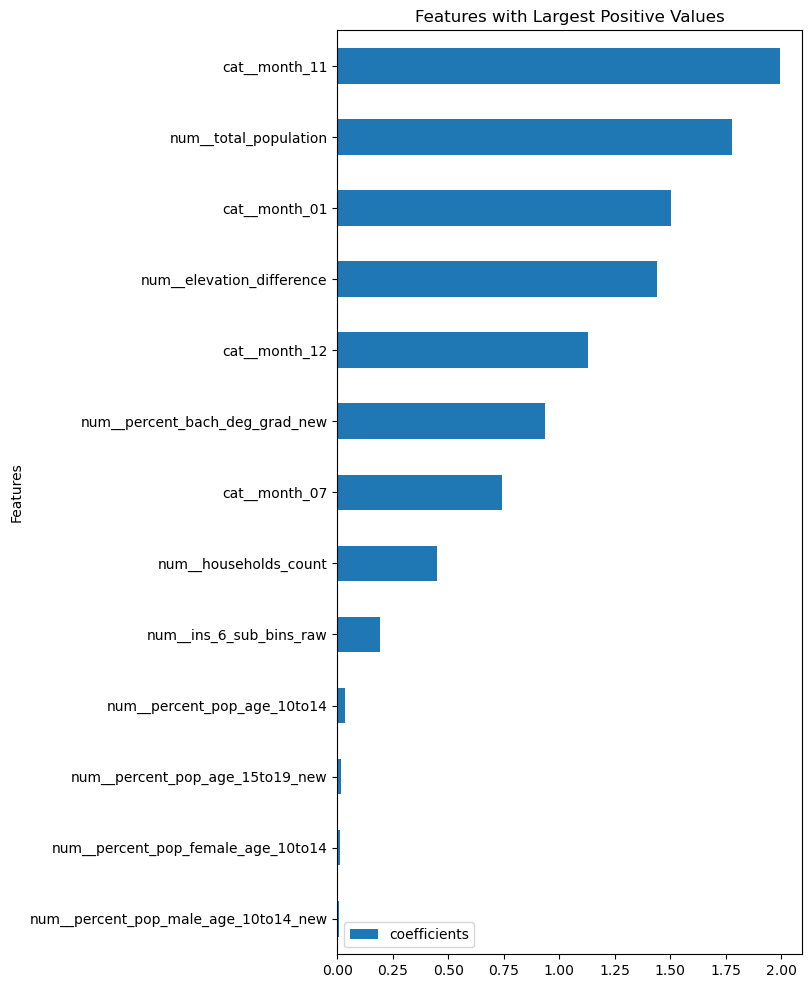

In [93]:
#Largest Positive Coefficients
ub=lcf1.loc[:,"coefficients"]>(lcf1.loc[:,"coefficients"].quantile(0.95))
lcf1[ub].set_index("Features").plot.barh(figsize=(6,12),title='Features with Largest Positive Values')

In [ ]:
# print table of values
#print(lcf1.to_markdown())

In [112]:
#cross validation
#Cross Validation    
#specify gridsearch and change cv to tscv
tscv = TimeSeriesSplit(n_splits = 5)
gridsearchcv = GridSearchCV(
estimator,
param_grid={'regressor__fit_intercept': [True, False]},
cv=tscv,
scoring=('r2'),
return_train_score=True,
refit='r2',
n_jobs=-1
) 

#cross validation
#    tscv = TimeSeriesSplit(n_splits = 5)



In [116]:
rscore1=[]
mse_tss=[]
mae_tss=[]
rmse_tss=[]

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_lasso.fit(X_train, y_train)
    y_pred = lr_lasso.predict(X_test)
    y_true=y_test
    #mae_tss.append(mean_absolute_error(y_true, y_pred))
    mse_tss.append(mean_squared_error(y_true, y_pred,squared=True))
    rmse_tss.append(mean_squared_error(y_true, y_pred,squared=False))
    rscore1.append(r2_score(y_true,y_pred))
print(rscore1)

[0.3771268716184579, 0.29868518134157196, 0.3118952638540955, 0.3767207956443155, -0.08530294010903594]
